In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from itertools import product
import pandas as pd

# set simulation variables
n_samples = 1000000
AB_test_size = 200
AB_simulation_size = 100

control_mean = 1.2
var = 0.05

In [2]:
def simulate_ab_test(figname,uplift = 1.0, seed = 20, conclusion = ''):
    np.random.seed(seed)
    control_data = np.random.normal(loc = control_mean, scale = var, size = n_samples)
    test_data = np.random.normal(loc = control_mean*uplift, scale = var, size = n_samples)

    p_val_dict  = {'80_20':[],'50_50':[]}
    
    
    for _,variation in product(range(AB_simulation_size),['80_20','50_50']):
        mf = 0.8 if variation == '80_20' else 0.5
        control_size = int(AB_test_size*mf)
        ab_control = np.random.choice(control_data,size=control_size,replace=False)
        ab_test = np.random.choice(test_data,size=AB_test_size - control_size,replace=False)
        t_stat,p_val = stats.ttest_ind(ab_control,ab_test)
        p_val_dict[variation].append(p_val)
    
    significance_80_20 = np.sum(pd.DataFrame(p_val_dict)['80_20']<0.05)/AB_simulation_size
    significance_50_50 = np.sum(pd.DataFrame(p_val_dict)['50_50']<0.05)/AB_simulation_size
    
    
    fig,(ax1,ax2) = plt.subplots(1,2,figsize = (12,5))
    
    ax1.hist(control_data,bins=30,density=True,alpha=0.6,color = 'b', label='Control Data')
    ax1.hist(test_data,bins=30,density=True,alpha=0.6,color = 'r', label='Test Data')
    
    ax1.set_title(f'Actual Distribution for Control Mean = {control_mean:0.2f}% and Test Mean = {control_mean*uplift:0.2f}%')
    ax1.set_xlabel('Click Rate')
    ax1.set_ylabel('Frequency')
    ax1.legend()
    
    
    
    ax2.hist(p_val_dict['80_20'],bins=30,density=True,alpha=0.6,color = 'b', label='80-20 Split')
    ax2.hist(p_val_dict['50_50'],bins=30,density=True,alpha=0.6,color = 'r', label='50-50 Split')
    
    ax2.set_title(f'Significance rate for 80/20 Split is {significance_80_20:.0%} and for 50/50 Split it is {significance_50_50:.0%}.')
    ax2.set_xlabel('P Values')
    ax2.set_ylabel('Frequency')
    
    ax2.legend()
    fig.suptitle(f'For {uplift-1:.0%} uplift in mean: '+ conclusion)
    plt.tight_layout()
    plt.savefig(figname)
    plt.show()

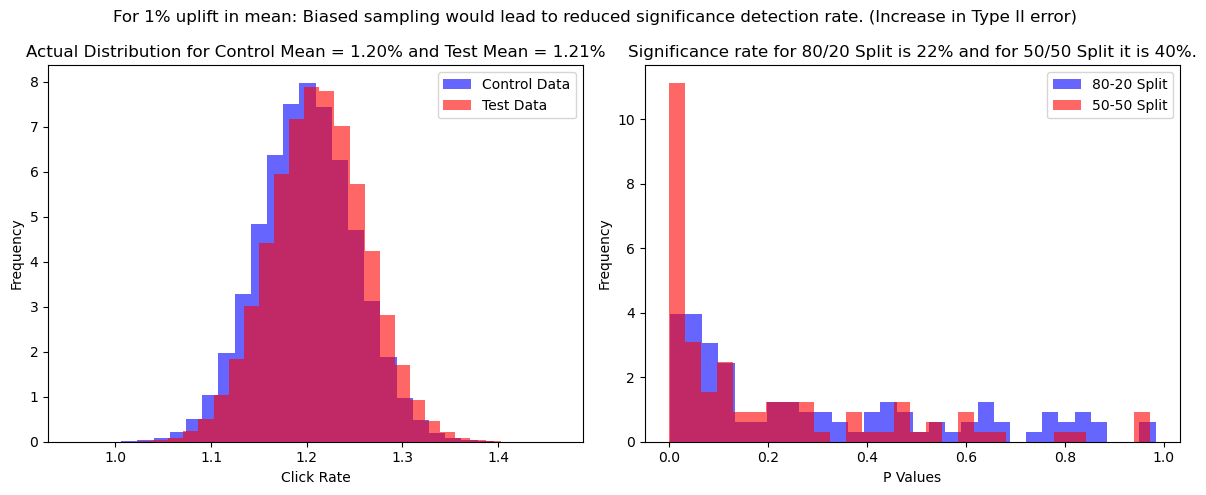

In [3]:
simulate_ab_test(figname='type2.png',uplift=1.01,seed=220,conclusion="Biased sampling would lead to reduced significance detection rate. (Increase in Type II error)")

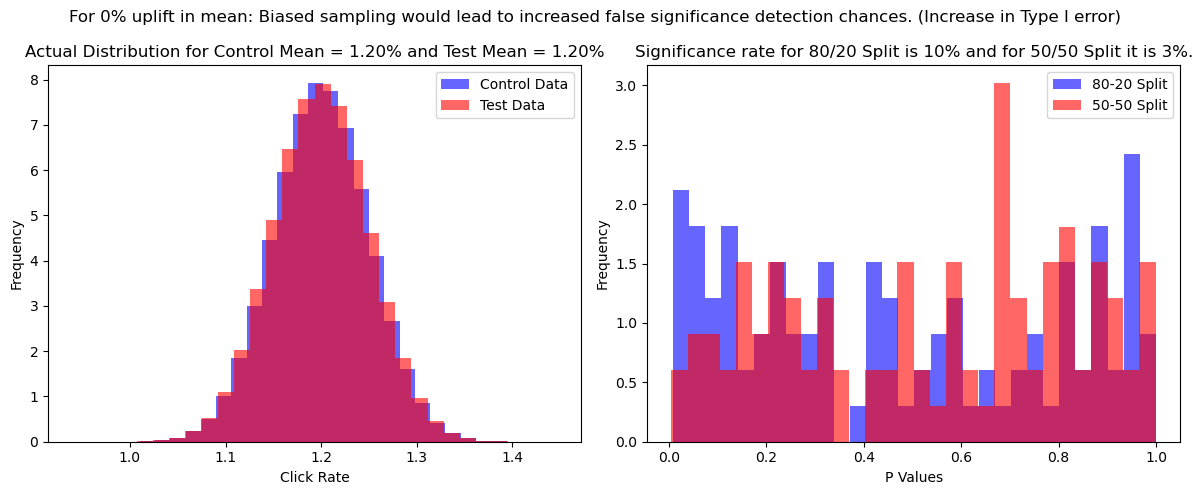

In [4]:
simulate_ab_test(figname='type1.png',uplift=1.0,seed=20,conclusion="Biased sampling would lead to increased false significance detection chances. (Increase in Type I error)")